In [16]:
import pandas as pd
import os
import math
from docx.enum.table import WD_TABLE_ALIGNMENT
import numpy as np
import pandas
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()
import datetime
from docx import Document
from docx.shared import Inches
from docx.shared import Cm
from docx.shared import Pt
from docx.shared import RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
from os import walk

mypath="C://Users//sli//Downloads//clinical"
changename="Yes"
os.chdir(mypath)

def insert_table(df_table,word_size,title):
        global table_number
        # get table data -------------nametable
        x=df_table.shape[0]+1
        y=df_table.shape[1]
        table = document.add_table(x,y)
        table.alignment = WD_TABLE_ALIGNMENT.CENTER
        table.style = 'TableGrid'

        for i in range(x):
            for j in range(y):
                if i==0:
                    table.rows[i].cells[j].text=str(df_table.columns[j])
                else:
                    table.rows[i].cells[j].text=str(df_table.iloc[i-1,j])
                #table.rows[i].cells[j].width = Inches(0.5)

                
        for row in table.rows:
            for cell in row.cells:
                paragraphs = cell.paragraphs
                for paragraph in paragraphs:
                    for run in paragraph.runs:
                        font = run.font
                        font.size= Pt(word_size)

        p = document.add_paragraph()
        p.alignment = 1
        run=p.add_run(title)
        table_number+=1
        font=run.font
        font.size = Pt(12)
filename_list=[]
for (dirpath, dirnames, filenames) in walk(mypath):
    filename_list.extend(filenames)
    break


In [15]:
filename_list

['average.png',
 'Winter2021MidtermStudentSatisfactionSurvey_AmericanUniversityofHealthSciences.xlsx']

KeyError: 6.0

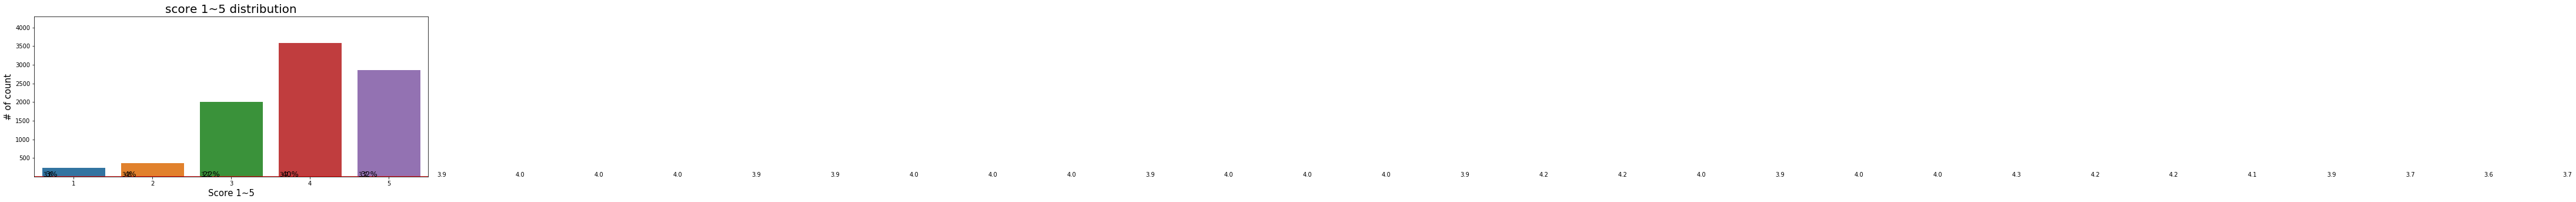

In [22]:
if 1==1:

    data = pd.read_excel(filename)
    season=["Summer","Spring","Fall","Winter"]
    doc_season=list(filter(lambda x:x.lower() in filename.lower(),season))[0]
    year=["2019", "2020","2021","2022", "2023", "2024", "2025", "2026", "2027", "2028", "2029"]
    doc_year=list(filter(lambda x:x in filename,year))[0]
    course=["Satisfaction"]
    doc_course=list(filter(lambda x:x.lower() in filename.lower(),course))

    document = Document()
    table_number=1   

    file_name=" ".join([doc_year,doc_season])+" "+" ".join(doc_course)+" "+" Survey Report"
    document.add_heading(file_name, 0)
    # Process data


    #去除0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data.iloc[i,j]==0:
                data.iloc[i,j]=None

    QuestionMapper = pd.read_excel(filename, sheet_name='QuestionMapper')
    questionname=list(QuestionMapper.iloc[10:42,0])
    questionmean=pd.DataFrame(data[questionname].apply(lambda x:round(np.mean(x),2)))


    #改名字
    for i in range(data.shape[1]):
        if "Question" in data.columns[i]:
            data.rename(columns={data.columns[i]:(data.columns[i][-2:]).replace(" ", "")},inplace=True)

    name=data.columns[13:46] 
    
    
    
    
    ave=data.describe().iloc[1,6:]
    average=ave.mean()
    plt.figure(figsize=(12,5))


    ax=sns.barplot(x=name,y=ave)
    plt.xticks(rotation=360)
    plt.ylim(ymin=2.5,ymax=ave.max()+0.3)
    plt.xlim(-1,33)
    sns.lineplot(x=np.linspace(-1,33,200),y=[average for i in range(200)],color="r")
    plt.xlabel("Question Number",size=15)
    plt.ylabel("Average Score",size=15)
    plt.title("Average Score by Question",size=25)
    for i in ax.patches:

        ax.text(i.get_x()+.01, i.get_height()+0.02, str(round((i.get_height()), 1)), fontsize=10)

    plt.savefig('average.png', dpi=400)

    p = document.add_paragraph()
    run=p.add_run(str(data.shape[0])+"students participated in this survey.")
    font=run.font
    font.size=Pt(13)


    document.add_picture('average.png', width=Inches(4))
    last_paragraph = document.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    p = document.add_paragraph()
    p.alignment = WD_ALIGN_PARAGRAPH.CENTER
    run=p.add_run("Average score："+str(average))
    font=run.font
    font.size=Pt(13)
    
    
   
    
    

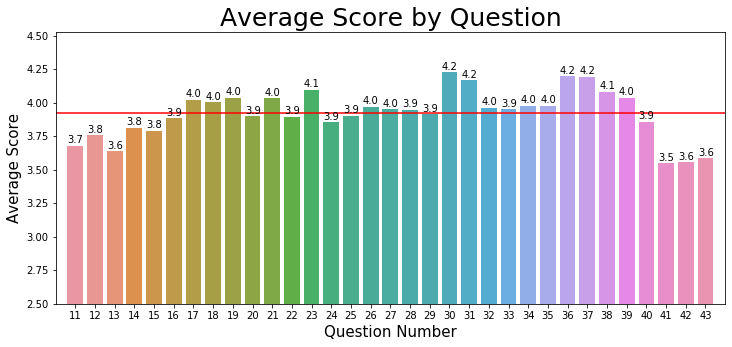

In [5]:

ave=data.describe().iloc[1,6:]
average=ave.mean()
plt.figure(figsize=(12,5))


ax=sns.barplot(x=name,y=ave)
plt.xticks(rotation=360)
plt.ylim(ymin=2.5,ymax=ave.max()+0.3)
plt.xlim(-1,33)
sns.lineplot(x=np.linspace(-1,33,200),y=[average for i in range(200)],color="r")
plt.xlabel("Question Number",size=15)
plt.ylabel("Average Score",size=15)
plt.title("Average Score by Question",size=25)
for i in ax.patches:
    
    ax.text(i.get_x()+.01, i.get_height()+0.02, str(round((i.get_height()), 1)), fontsize=10)

plt.savefig('average.png', dpi=400)

p = document.add_paragraph()
run=p.add_run(str(data.shape[0])+"students participated in this survey.")
font=run.font
font.size=Pt(13)


document.add_picture('average.png', width=Inches(4))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
p = document.add_paragraph()
p.alignment = WD_ALIGN_PARAGRAPH.CENTER
run=p.add_run("Average score："+str(average))
font=run.font
font.size=Pt(13)


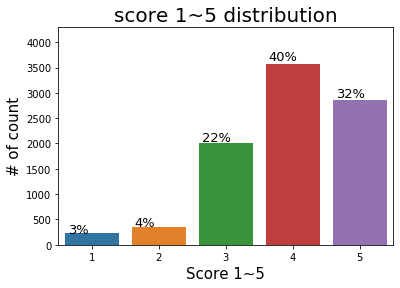

In [23]:
count=data[name].apply(lambda x:x.value_counts(),axis=0).apply(sum,axis=1)
ax=sns.barplot(x=np.arange(1,6),y=count)
plt.title("score 1~5 distribution",size=20)
plt.ylabel("Number of count")
plt.xticks(rotation=360)
plt.ylim(ymax=count.max()*1.2)
plt.xlabel("Score 1~5",size=15)
plt.ylabel("# of count",size=15)

t=1
perc=count/count.sum()
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()*1.02, "{0:.0%}".format(perc[t]), fontsize=13)
    t+=1
plt.savefig('countscore.png', dpi=200)


               
document.add_picture('countscore.png', width=Inches(4))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

In [24]:
questiontable=pd.merge(QuestionMapper.set_index("Column"),questionmean,left_index=True, right_index=True,how="inner")
questiontable=questiontable.sort_values(by=[0]).reset_index(drop=False).rename(columns={0:"Score"})
insert_table(questiontable,10,"")

C:\ProgramData\Anaconda3\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


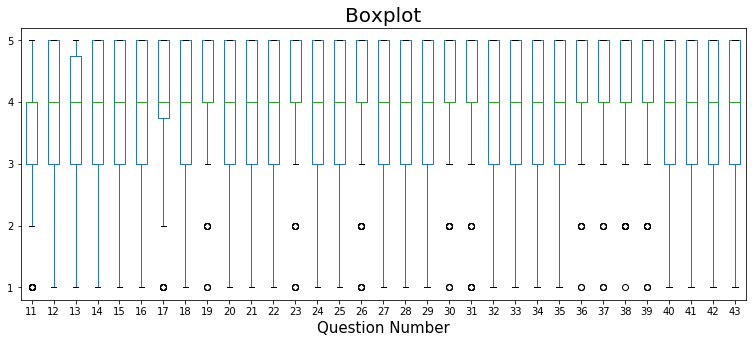

In [25]:
#boxplot
plt.figure(figsize=(13,5))   #(18,27)

data[name].boxplot(grid=False)
plt.yticks(np.arange(1, 5.2, step=1))

plt.title("Boxplot",size=20)
plt.savefig('boxplot.png', dpi=500)
plt.xlabel("Question Number",size=15)

plt.show()

In [26]:
# Commment table
p=document.add_heading(level=1)
p.add_run('Comment').font.size=Pt(22) 
comment=pd.DataFrame(data["44"].dropna(how="any")).rename(columns={"44":"Comment"})
insert_table(comment,10,"")
document.save(file_name+'.docx')

C:\ProgramData\Anaconda3\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


In [11]:
total=data.append(data)


In [13]:
len(total)

606